In [1]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u


import matplotlib.colors as colors
#from astropy.visualization import imshow_norm, MinMaxInterval, LogStretch,PercentileInterval, ImageNormalize

import sep
sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))
from catalog import *

sys.path.append(os.path.expanduser('~/repos/runawaysearch/src'))
from gaiastars import gaiastars as gs

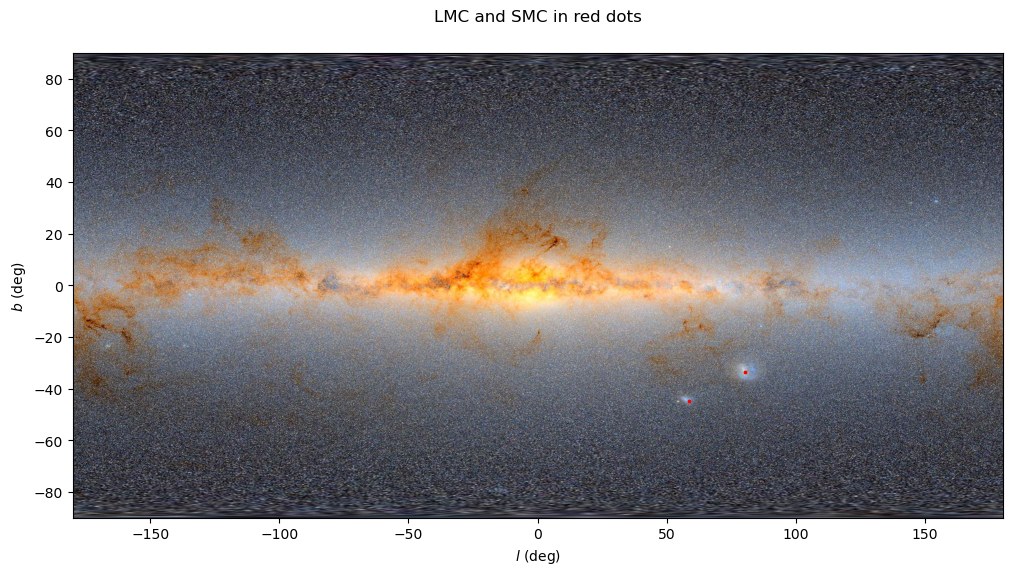

In [9]:
from astropy import units as u
from mw_plot import MWSkyMap

mw1 = MWSkyMap(background='CDS/P/DM/flux-color-Rp-G-Bp/I/355/gaiadr3',figsize=(12,8))
mw1.title = "LMC and SMC in red dots"
mw1.scatter([78.77, 16.26] * u.degree, [-69.01, -72.42] * u.degree, c="r", s=3)

In [10]:
rg_tbl=pd.read_csv('/home/kevin/Documents/HH24/schonhut-stasik/apok2_compiled_dec20.csv', low_memory=False)

In [60]:
rg_tbl.loc[333][['gaia_source', 'ra','dec', 'glon','glat']]

gaia_source    64478454230094720
ra                        54.071
dec                       21.702
glon                      166.31
glat                      -26.97
Name: 333, dtype: object

In [15]:
hh24Eb = SkyCoord(ra='5:46:08.3973',dec='-0:10:00.573', unit=(u.hourangle, u.deg))
hh24Eb_cone = gs()
# hh24Eb_cone.gaia_source_constraints= [
#     '{schema}.gaia_source.source_id is not Null']
hh24Eb_cone.conesearch(hh24Eb.ra,hh24Eb.dec,0.5*u.deg)
print(f'Cone Search returned {len(hh24Eb_cone.objs)} objects')

INFO: Query finished. [astroquery.utils.tap.core]
Cone Search returned 780 objects


In [54]:
hh24Eb

<SkyCoord (ICRS): (ra, dec) in deg
    (86.53498875, -0.16682583)>

In [55]:
hh24Eb.galactic

<SkyCoord (Galactic): (l, b) in deg
    (205.47710507, -14.56520962)>

In [61]:
hh24Eb_cone.tap_query_string

"SELECT  gaiaedr3.gaia_source.source_id, gaiaedr3.gaia_source.ra, gaiaedr3.gaia_source.dec, gaiaedr3.gaia_source.parallax, gaiaedr3.gaia_source.pmra, gaiaedr3.gaia_source.pmdec, gaiaedr3.gaia_source.dr2_radial_velocity, gaiaedr3.gaia_source.phot_g_mean_mag, gaiaedr3.gaia_source.phot_bp_mean_mag, gaiaedr3.gaia_source.phot_rp_mean_mag, gaiaedr3.gaia_source.ruwe FROM gaiaedr3.gaia_source WHERE CONTAINS(POINT('', ra, dec),  CIRCLE('', 86.53498875, -0.1668258333333333, 0.5)) = 1  AND gaiaedr3.gaia_source.parallax_over_error > 10 AND gaiaedr3.gaia_source.phot_g_mean_flux_over_error>50 AND gaiaedr3.gaia_source.phot_rp_mean_flux_over_error>20 AND gaiaedr3.gaia_source.phot_bp_mean_flux_over_error>20 AND gaiaedr3.gaia_source.phot_bp_rp_excess_factor < 1.3+0.06*power(gaiaedr3.gaia_source.phot_bp_mean_mag-gaiaedr3.gaia_source.phot_rp_mean_mag,2) AND gaiaedr3.gaia_source.phot_bp_rp_excess_factor > 1.0+0.015*power(gaiaedr3.gaia_source.phot_bp_mean_mag-gaiaedr3.gaia_source.phot_rp_mean_mag,2) AND gai

In [52]:
coords = hh24Eb_cone.get_coords()
# hh24Ebglon = coords.l
# hh24Ebglat = coords.b

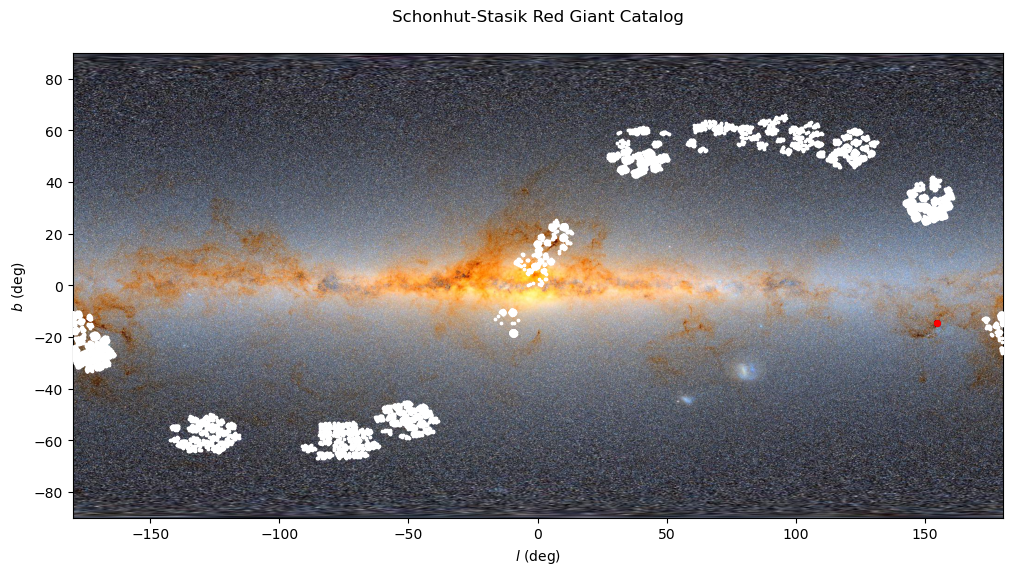

In [53]:
glon = np.array(rg_tbl.ra)*u.deg
glat = np.array(rg_tbl.dec)*u.deg


mw1 = MWSkyMap(background='CDS/P/DM/flux-color-Rp-G-Bp/I/355/gaiadr3',figsize=(12,8))
#mw1.transform(ax)

mw1.title ='Schonhut-Stasik Red Giant Catalog'
mw1.scatter(glon, glat , c="w", s=3)
mw1.scatter(coords.ra, coords.dec, c='r', s=2)


In [38]:
glon[:10]

<Quantity [ 9.19,  9.87,  9.3 ,  9.72,  9.9 ,  9.64, 10.45,  9.84,  9.14,
            9.99] deg>

In [39]:
rg_tbl.glon[:10]

0     9.19
1     9.87
2     9.30
3     9.72
4     9.90
5     9.64
6    10.45
7     9.84
8     9.14
9     9.99
Name: glon, dtype: float64

In [44]:
from astropy.coordinates import Angle, Longitude, Latitude
import astropy.units as u

In [65]:
hh24Ebglon = Longitude(hh24Ebglon, wrap_angle=180*u.deg)
hh24Ebglat = Latitude(hh24Ebglat)

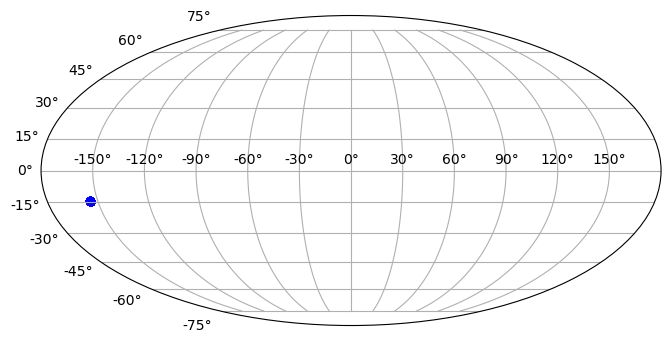

In [73]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot( projection='mollweide')
#ax.scatter(glon,  glat, s=2, c='red')
ax.scatter(np.radians(hh24Ebglon), np.radians(hh24Ebglat), c='b', s=20)
#ax.scatter(np.radians(-30), np.radians(30), s=20, color='red')
ax.grid()

In [81]:
coords = hh24Eb_cone.get_coords().galactic
hh24Ebglon = Longitude(coords.l, wrap_angle=180*u.degree)
hh24Ebglat = coords.b

In [84]:
glon = Longitude(np.array(rg_tbl.glon)*u.deg, wrap_angle=180*u.deg)
glat = np.array(rg_tbl.glat)*u.deg

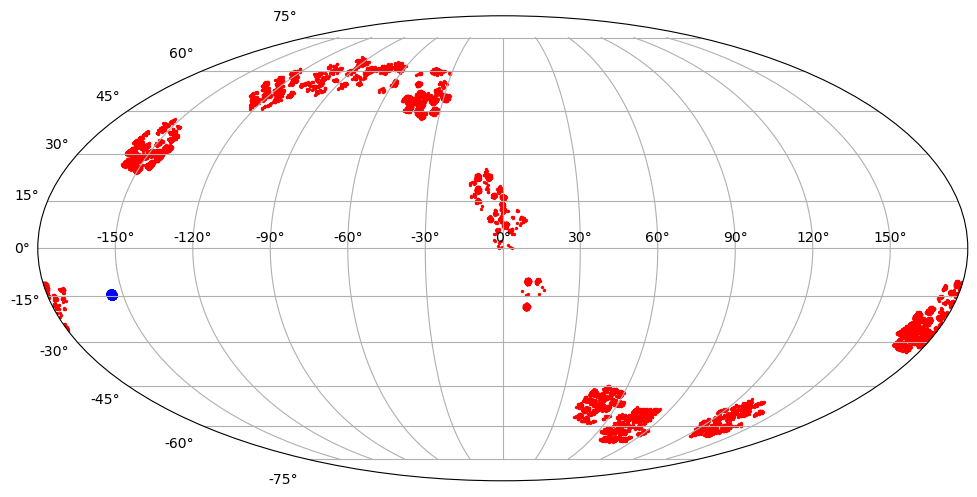

In [90]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot( projection='mollweide')
ax.scatter(np.radians(glon),  np.radians(glat), s=2, c='red')
ax.scatter(np.radians(hh24Ebglon), np.radians(hh24Ebglat), c='b', s=20)
#ax.scatter(np.radians(-30), np.radians(30), s=20, color='red')
#ax.invert_xaxis()
ax.grid()

In [102]:
rg_ra = np.array(rg_tbl.ra)*u.deg
rg_dec = np.array(rg_tbl.dec)*u.deg

In [122]:
hh24Eb_cone.conesearch(hh24Eb.ra,hh24Eb.dec,3.0*u.deg)
print(f'Cone Search returned {len(hh24Eb_cone.objs)} objects')

INFO: Query finished. [astroquery.utils.tap.core]
Cone Search returned 44555 objects


In [123]:
coords = hh24Eb_cone.get_coords()

In [132]:
celest_eq = SkyCoord(np.arange(360)*u.degree, 0*u.degree)

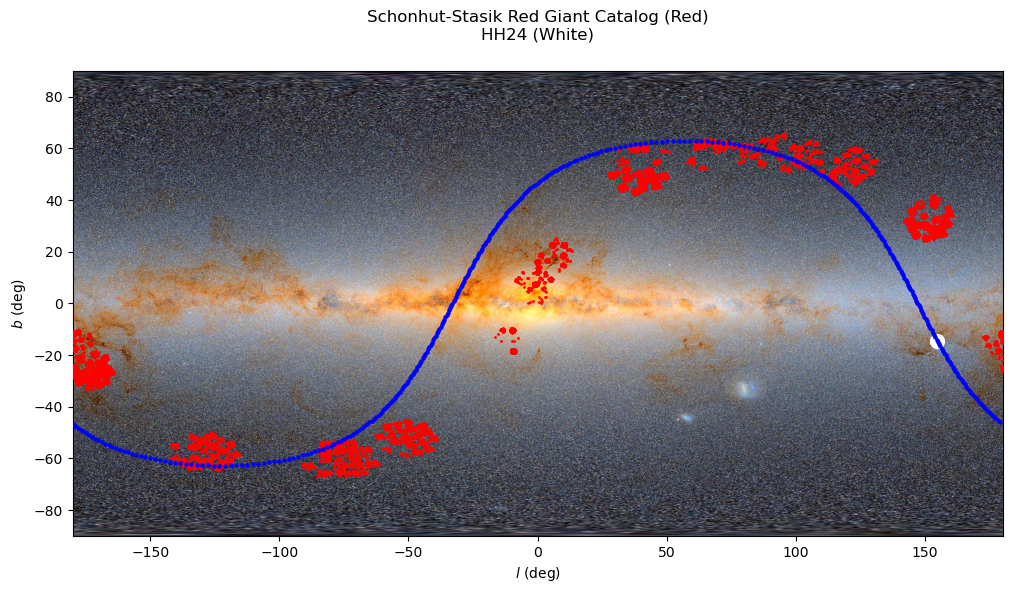

In [133]:
mw1 = MWSkyMap(background='Color flux map for I/355/gaiadr3 (Gaia DR3)',figsize=(12,8))
#mw1.transform(ax)

mw1.title ='Schonhut-Stasik Red Giant Catalog (Red)\nHH24 (White)'
mw1.scatter(rg_ra, rg_dec , c="r", s=1)
mw1.scatter(hh24Eb.ra,hh24Eb.dec, c='w', s=100)
mw1.scatter(celest_eq.ra, celest_eq.dec, s=5, c='b')

#mw1.scatter([78.77, 16.26] * u.degree, [-69.01, -72.42] * u.degree, c="r", s=3)
# mw1.scatter(smc.ra, smc.dec, c='r', s=90)
# mw1.scatter(lmc.ra, lmc.dec, c='b', s=90)
# mw1.scatter(0*u.deg, 0*u.deg, c='green', s=90)

In [104]:
Longitude(hh24Eb.galactic.l, wrap_angle=180*u.deg)

<Longitude -154.52289493 deg>

In [119]:
smc = SkyCoord(ra = '00:52:44.8',dec='-72:49:43', unit=(u.hourangle, u.degree))
lmc = SkyCoord(ra='05:23:34.5',dec = '-69:45:22', unit=(u.hourangle, u.degree))

In [121]:
smc.galactic

<SkyCoord (Galactic): (l, b) in deg
    (302.79695857, -44.29929833)>

In [108]:
MC = SkyCoord([78.77, 16.26] * u.degree, [-69.01, -72.42] * u.degree,)

In [110]:
MC[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (78.77, -69.01)>

In [126]:
MWSkyMap.search_sky_background(keywords='ESA')

['PLANCK Map of the CMB fluctuations',
 'PLANCK R3 HFI color composition 353-545-857 GHz',
 'PLANCK R3 frequency HFI map 100 GHz',
 'PLANCK R3 frequency HFI map 143 GHz',
 'PLANCK R3 frequency HFI map 217 GHz',
 'PLANCK R3 frequency HFI map 353 GHz',
 'PLANCK R3 frequency HFI map 545 GHz',
 'PLANCK R3 frequency HFI map 857 GHz',
 'PLANCK R3 LFI Color composition 30-44-70 GHz',
 'PLANCK R3 frequency LFI map 30 GHz',
 'PLANCK R3 frequency LFI map 44 GHz',
 'PLANCK R3 frequency LFI map 70 GHz']